# Modelling

In [ ]:
def confusion_mat(test_y,predict_y):
    ''' Function to Visualize the Confusion Matrix'''

    labels = [0,1]
    plt.figure(figsize=(6,6))
    cmap=sns.light_palette("blue")
    C = confusion_matrix(test_y, predict_y)
    print("Percentage of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    sns.heatmap(C, cmap="Blues",annot=True,annot_kws={"size": 16},fmt='g')
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title('Confusion matrix')

    plt.show()

### K-Nearest Neighbour Algorithm


F1 score for : 3 is 0.6122448979591838 
F1 score for : 5 is 0.613861386138614 
F1 score for : 7 is 0.5909090909090909 
F1 score for : 9 is 0.6095238095238096 
F1 score for : 11 is 0.6031746031746031 
F1 score for : 13 is 0.6148867313915858 

  Best alpha (hyperparameter) : 13 



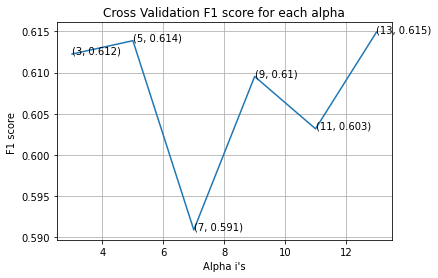


 Predicting F1 score for train,cv and test data with best hyperparameter 

F1 score for train data :  0.9164840516191867
F1_score for cv data :  0.6148867313915858
F1_score for test data :  0.6452905811623246
****************************************************************************************************
Confusion Matrix for the Train Data  

Percentage of misclassified points  1.5544276262122723


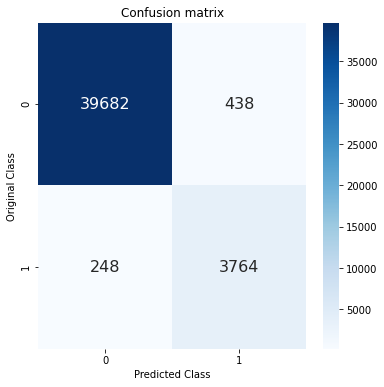

****************************************************************************************************
Confusion Matrix for the Test Data  

Percentage of misclassified points  1.4749999999999999


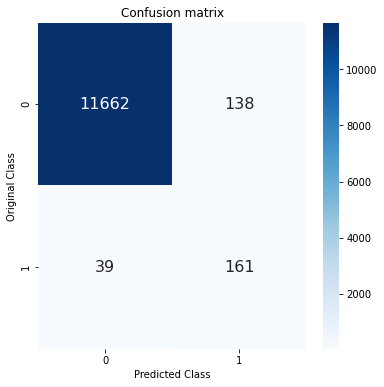

****************************************************************************************************


In [ ]:
#Setting the range of best K's to select from
alpha = [x for x in range(3, 15, 2)]

#storing all the Cross validation f1 scores
cv_f1score_array=[]
for i in tqdm(alpha):
    KNN=KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    KNN.fit(X_train,y_train)
    predict_y = KNN.predict(X_cv)
    cv_f1score_array.append(f1_score(y_cv, predict_y,average='binary'))

#displaying the F1 score for all hyperparameters
for i in range(len(cv_f1score_array)):
    print ('F1 score for : {} is {} '.format(alpha[i],cv_f1score_array[i]))

#The best K after hyperparameter tuning
best_alpha_KNN = np.argmax(cv_f1score_array)


print( '\n  Best alpha (hyperparameter) :',alpha[best_alpha_KNN]  ,'\n')

#plotting the changes of the performance metric with best hyperparameter
fig, ax = plt.subplots()


#plotting hyperparameter v/s F1score  graph
ax.plot(alpha, cv_f1score_array)
for i, txt in enumerate(np.round(cv_f1score_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_f1score_array[i]))
plt.grid()
plt.title("Cross Validation F1 score for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("F1 score ")
plt.show()

#fitting the classifier with best hyperparameter
KNN=KNeighborsClassifier(n_neighbors=alpha[best_alpha_KNN],n_jobs=-1)
KNN.fit(X_train, y_train)

#predicting actual labels
pred_y=KNN.predict(X_test)

#displaying the perfomance metric for train,cv and test data
print('\n Predicting F1 score for train,cv and test data with best hyperparameter \n')
pred_y_train = KNN.predict(X_train)
print ('F1 score for train data : ',f1_score(y_train, pred_y_train,average='binary' ))
pred_y_cv = KNN.predict(X_cv)
print ('F1_score for cv data : ',f1_score(y_cv, pred_y_cv, average='binary'))
pred_y_test = KNN.predict(X_test)
print ('F1_score for test data : ',f1_score(y_test, pred_y_test, average='binary'))
print('*'*100)
print("Confusion Matrix for the Train Data ",'\n')
confusion_mat(y_train,pred_y_train)
print('*'*100)
print("Confusion Matrix for the Test Data ",'\n')
confusion_mat(y_test,pred_y_test)
print('*'*100)
